In [41]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

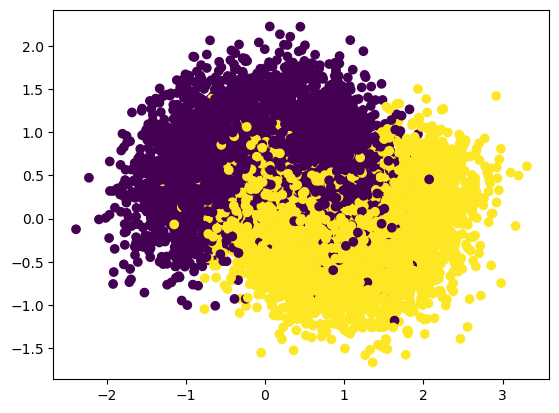

In [43]:
mpl.scatter(X[:,0], X[:,1], c=y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
# kn_clf = KNeighborsClassifier()
# deafult False, which could not be used for voting='soft' in the voting classifier
# For voting='soft' to work, all predictors need the predict_proba() function. 
# In SVC, you need to se probability=True for predisct_proba() to work


# params_log = {'C': (1, 10, 50, 100)}

# grid_log_clf = GridSearchCV(
#     log_clf, params_log, cv=3
# )

# params_rnd_clf = {'max_leaf_nodes': (1, 10, 20), 'max_depth': (1, 2, 3, 4, 5)}
# grid_rnd_clf = GridSearchCV(
#     rnd_clf, params_rnd_clf, cv=3
# )

# params_svc_clf = {'C': (1, 10, 20, 50), 'kernel': ('rbf', 'poly'), 'gamma': (1, 5, 10, 15)}
# grid_svc_clf = GridSearchCV(
#     svm_clf, params_svc_clf, cv=3
# )

# params_kn = {'n_neighbors': (1, 5, 10, 15)}
# grid_kn_clf = GridSearchCV(
#     kn_clf, params_kn, cv=3
# )


# for clf in (grid_log_clf, grid_rnd_clf, grid_svc_clf, grid_kn_clf):
#     clf.fit(X_train, y_train)

In [53]:

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting="hard")

ypred = voting_clf.fit(X_train, y_train)

# for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     clf.fit(X_train, y_train)
#     ypred = clf.predict(X_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, ypred))

# VotingClassifier returns the AVERAGE of the models results.




InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))]) instead.

In [7]:
import numpy as np
i_s = []
accs = []

best_fit_gamma = 0
acc_score = 0

for i in np.arange(1.0, 2.0, 0.1):
    svm_clf = SVC(gamma=i)
    svm_clf.fit(X_train, y_train)
    ypred = svm_clf.predict(X_test)
    acc = accuracy_score(y_test, ypred)

    i_s.append(i)
    accs.append(acc)

    if acc > acc_score:
        acc_score = acc
        best_fit_gamma = i

KeyboardInterrupt: 

In [ ]:
print(i_s)
print(accs)

print(f"Best gamma is: {best_fit_gamma}")
print(f"Score: {acc_score}")
      


[1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008]
[0.8745, 0.8745, 0.8755, 0.876, 0.875, 0.8745, 0.8735, 0.8735, 0.873, 0.8725]
Best gamma is: 1.3000000000000003
Score: 0.876


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging = bootstrap=True
# Pasting = boostrap=False

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)

# OOB score is the estimated accuracy score.
# The bagging model does not create samples from all the data
# Saves some and can make a test evaluation of that is oob_score=True
bag_clf.oob_score_


0.862875

In [ ]:
y_pred = bag_clf.predict(X_test)

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"OOB Score: {bag_clf.oob_score_}")

Accuracy Score: 0.876
OOB Score: 0.862875


# Create a loop that goes through a few differend iterations and compares on average how well oob predicts accuracy

In [ ]:
bag_clf_2 = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)

accs = []
oobs = []

for i in range(1, 6, 1):
    bag_clf_2.fit(X_train, y_train)
    y_pred = bag_clf_2.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    oobs.append(bag_clf.oob_score_)

print(accs)
print(oobs)

[0.875, 0.874, 0.8725, 0.8715, 0.871]
[0.862875, 0.862875, 0.862875, 0.862875, 0.862875]


In [ ]:
avg_accs = np.mean(accs)
avg_oob = np.mean(oobs)
# diff_percent = (avg_oob - avg_accs) / avg_oob * 100

# print(diff_percent)
print(avg_oob - avg_accs)

-0.009925000000000073


In [ ]:
tot = []
for i in enumerate(accs):
    x = i[1] - oobs[1]
    tot.append(x)



Average deviation of predicted OOB: 0.993%


In [40]:
from scipy.stats import binom

# sannolikhet att vi får 500 eller mindre korrekta svar
# ändrar vi till 450 så får vi sannolikheten att vi får 450 eller färre korrekta svar
# huh? Nej, jag fattar inte
binom.cdf(450, n=1000, p=0.51)

8.320038176910578e-05